<a href="https://colab.research.google.com/github/sks-saurav/Deep_learning_Learning/blob/main/first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [8]:
train_labels = []
train_samples = []

In [9]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
for i in train_samples:
    print(i)

In [ ]:
for i in train_labels:
    print(i)

In [11]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
  print(i)

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [17]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
print(tf.version.VERSION)
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0
2.4.1


In [18]:
model = Sequential([
                    Dense(units = 16, input_shape = (1,), activation= 'relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

In [21]:
model.fit(  x=scaled_train_samples, 
            y=train_labels,
            validation_split = 0.1,
            batch_size=10, 
            epochs=30,
            verbose=2
          )

Epoch 1/30
189/189 - 1s - loss: 0.7575 - accuracy: 0.4746 - val_loss: 0.7262 - val_accuracy: 0.5762
Epoch 2/30
189/189 - 0s - loss: 0.7170 - accuracy: 0.4915 - val_loss: 0.6941 - val_accuracy: 0.5762
Epoch 3/30
189/189 - 0s - loss: 0.6816 - accuracy: 0.7302 - val_loss: 0.6673 - val_accuracy: 0.8095
Epoch 4/30
189/189 - 0s - loss: 0.6538 - accuracy: 0.7958 - val_loss: 0.6411 - val_accuracy: 0.8000
Epoch 5/30
189/189 - 0s - loss: 0.6258 - accuracy: 0.7995 - val_loss: 0.6148 - val_accuracy: 0.8000
Epoch 6/30
189/189 - 0s - loss: 0.6004 - accuracy: 0.8132 - val_loss: 0.5901 - val_accuracy: 0.8000
Epoch 7/30
189/189 - 0s - loss: 0.5745 - accuracy: 0.8280 - val_loss: 0.5621 - val_accuracy: 0.8286
Epoch 8/30
189/189 - 0s - loss: 0.5478 - accuracy: 0.8317 - val_loss: 0.5337 - val_accuracy: 0.8619
Epoch 9/30
189/189 - 0s - loss: 0.5220 - accuracy: 0.8487 - val_loss: 0.5084 - val_accuracy: 0.8619
Epoch 10/30
189/189 - 0s - loss: 0.4975 - accuracy: 0.8519 - val_loss: 0.4812 - val_accuracy: 0.8714

In [22]:
test_samples = []
test_labels = []

In [23]:
for i in range(10):
  val = randint(13,64)
  test_samples.append(val)
  test_labels.append(1)

for i in range(10):
  val = randint(65,100)
  test_samples.append(val)
  test_labels.append(0)

for i in range(200):
  val = randint(13,64)
  test_samples.append(val)
  test_labels.append(0)

for i in range(200):
  val = randint(65,100)
  test_samples.append(val)
  test_labels.append(1)

In [24]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [25]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [31]:
predictions = model.predict(scaled_test_samples,
                           batch_size = 10,
                           verbose=1)

42/42 [==============================] - 0s 872us/step


In [ ]:
for i in predictions:
  print(i)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)
for i in rounded_predictions:
  print(i)

In [32]:
print(test_samples.size)
print(test_labels.size)
print(predictions.size)
print(rounded_predictions.size)

420
420
840
420


In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [35]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[186  24]
 [ 10 200]]


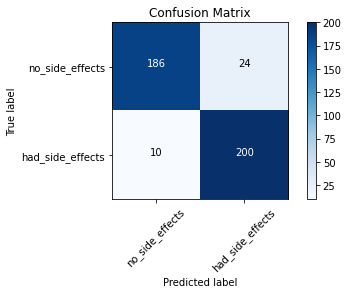

In [37]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [46]:
import os
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('model/medical_trial_model.h5')

In [48]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [50]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

In [52]:
new_model.optimizer

In [53]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [54]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [59]:
if os.path.isfile('models/my_model_weight.h5') is False:
  model.save_weights('models/my_model_weight.h5')

In [62]:
model2 = Sequential([
                     Dense(units=16, activation='relu',input_shape=(1,)),
                     Dense(units=32, activation='relu'),
                     Dense(units=2, activation='softmax')
                     
])
model2.load_weights('models/my_model_weight.h5')

In [63]:
model2.get_weights()

[array([[-0.15328032, -0.22006044, -0.19494155,  0.36711982, -0.40737215,
         -0.46883166,  0.52873987,  0.71350104,  0.45048785,  0.533272  ,
         -0.09803903, -0.4067744 , -0.17124218,  0.49295434,  0.00230311,
         -0.06550449]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.10353278,  0.        ,
         0.        , -0.14269453,  0.21158613, -0.13915221,  0.0309115 ,
         0.        ,  0.        ,  0.        , -0.12746455, -0.00362594,
         0.        ], dtype=float32),
 array([[ 3.14754337e-01, -3.23211372e-01, -1.67904779e-01,
         -2.22229540e-01,  5.88733256e-02, -3.17629427e-01,
         -3.36619794e-01, -1.46292895e-01,  2.88717061e-01,
          9.26681757e-02,  1.96995109e-01,  1.91290468e-01,
          2.67552227e-01,  1.06115222e-01,  1.71373188e-02,
          1.60378844e-01,  3.48827451e-01,  3.11705261e-01,
         -1.34657830e-01,  3.07333022e-01,  3.08700711e-01,
          3.10882837e-01,  6.17342591e-02, -2.85159647e-02,
 